In [33]:
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('Final_dataset_Diabetes_Complication.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,3,1,1,1,1,1,1,1,3,1,...,1,3,1,2,2,1,2,2,1,2
1,5,3,1,1,2,4,2,1,5,1,...,1,2,2,2,2,2,2,2,1,1
2,4,1,1,1,2,1,2,2,2,2,...,2,3,1,2,2,2,2,2,2,1
3,4,1,1,1,2,4,2,1,1,1,...,2,3,2,2,2,2,1,2,1,2
4,2,1,1,3,1,3,1,1,1,1,...,1,3,1,2,2,2,2,2,2,2


In [35]:
data_feature = data.iloc[:, :26]
data_label = data.iloc[:, 26:]

In [36]:
scaler = MinMaxScaler()
scaler.fit(data_feature)
X = scaler.transform(data_feature)
X = pd.DataFrame(X, columns=data_feature.columns)
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26
0,0.50,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.4,0.0,...,1.0,0.0,0.000000,0.333333,1.0,1.0,0.666667,0.0,1.0,0.0
1,1.00,1.0,0.0,0.000000,1.0,1.000000,1.0,0.0,0.8,0.0,...,1.0,0.0,0.285714,1.000000,0.5,1.0,0.000000,0.0,0.5,1.0
2,0.75,0.0,0.0,0.000000,1.0,0.000000,1.0,1.0,0.2,0.5,...,1.0,0.0,0.000000,0.333333,0.0,1.0,0.666667,1.0,1.0,0.0
3,0.75,0.0,0.0,0.000000,1.0,1.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,1.000000,1.0,0.0,0.666667,1.0,1.0,1.0
4,0.25,0.0,0.0,0.666667,0.0,0.666667,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.333333,0.0,1.0,0.666667,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604073,0.50,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,1.000000,1.000000,0.5,1.0,0.666667,0.0,1.0,1.0
604074,0.25,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.8,0.0,...,0.0,0.0,0.142857,1.000000,0.5,0.0,0.000000,0.0,0.5,1.0
604075,0.00,0.5,0.0,0.000000,0.0,0.666667,0.0,0.0,0.2,0.0,...,1.0,1.0,0.000000,0.333333,1.0,0.0,0.666667,0.0,1.0,0.0
604076,0.50,0.0,1.0,0.000000,0.0,0.666667,0.0,0.0,0.2,0.5,...,1.0,0.0,0.000000,0.666667,0.5,1.0,0.666667,0.0,1.0,1.0


In [37]:
scaler.fit(data_label)
Y = scaler.transform(data_label)
Y = pd.DataFrame(Y, columns=data_label.columns)
Y

,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
604073,1.0,1.0,1.0,1.0,1.0,1.0,1.0
604074,1.0,1.0,0.0,1.0,1.0,1.0,0.0
604075,1.0,1.0,1.0,1.0,1.0,1.0,0.0
604076,1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [43]:
Y['powerlabel'] = Y.apply(lambda x : 
                    (2)*x["Y1"]+
                    (4)*x['Y2']+
                    (8)*x['Y3']+
                    (16)*x['Y4']+
                    (32)*x['Y5']+
                    (64)*x['Y6']+
                    (128)*x['Y7']
                    ,axis=1)


In [50]:
df_new = pd.concat([X, Y], axis=1)
df_new[df_new['powerlabel'] == 254]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7,powerlabel
4,0.25,0.0,0.0,0.666667,0.0,0.666667,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,254.0
6,0.00,0.0,0.0,0.666667,0.0,1.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,254.0
12,0.00,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,254.0
19,0.75,0.0,0.0,0.333333,1.0,1.000000,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,254.0
24,0.50,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604069,0.75,0.0,0.0,0.333333,0.0,1.000000,0.0,0.0,0.8,0.5,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,254.0
604070,0.25,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,254.0
604072,0.00,0.0,1.0,0.000000,0.0,1.000000,0.0,0.0,0.8,0.5,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,254.0
604073,0.50,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,254.0


In [74]:
df_uni = df_new[df_new['powerlabel'] < 254]

In [59]:
y1 = df_new[df_new['powerlabel'] == 252]
y2 = df_new[df_new['powerlabel'] == 250]
y3 = df_new[df_new['powerlabel'] == 246]
y4 = df_new[df_new['powerlabel'] == 238]
y5 = df_new[df_new['powerlabel'] == 222]
y6 = df_new[df_new['powerlabel'] == 190]
y7 = df_new[df_new['powerlabel'] == 126]

In [61]:
print('Y1 =', len(y1))
print('Y2 =', len(y2))
print('Y3 =', len(y3))
print('Y4 =', len(y4))
print('Y5 =', len(y5))
print('Y6 =', len(y6))
print('Y7 =', len(y7))
print('Multi =', len(df_new[df_new['powerlabel'] < 254]))

Y1 = 2788
Y2 = 2381
Y3 = 2470
Y4 = 2956
Y5 = 11716
Y6 = 70168
Y7 = 106316
Multi = 374176


In [88]:
df_y1 = df_uni[df_uni['powerlabel'] < 64]
df_y1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7,powerlabel
1,1.00,1.0,0.0,0.000000,1.0,1.000000,1.0,0.0,0.8,0.0,...,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,62.0
5,0.75,0.0,0.0,0.000000,1.0,0.333333,1.0,0.0,0.0,0.0,...,0.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,42.0
10,1.00,1.0,0.0,0.000000,1.0,0.000000,1.0,0.0,0.2,0.0,...,0.5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,58.0
13,1.00,0.5,0.0,0.000000,0.0,0.666667,0.0,0.0,0.0,0.0,...,0.5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,42.0
16,0.50,1.0,0.0,1.000000,1.0,0.333333,1.0,0.0,0.2,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603998,0.75,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,62.0
604011,0.50,0.5,0.0,0.333333,0.0,1.000000,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,62.0
604025,1.00,1.0,0.0,0.000000,1.0,0.666667,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,62.0
604044,0.00,1.0,0.0,0.000000,0.0,0.666667,0.0,0.0,0.8,0.5,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,58.0


In [89]:
2+4+8+16+32

62

In [96]:
df_multiplied = pd.concat([df_uni.copy() for i in range(20)], ignore_index=True)
df_multiplied

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7,powerlabel
0,0.50,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.4,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,182.0
1,1.00,1.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.8,0.0,...,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,62.0
2,0.75,0.0,0.0,0.0,1.0,0.000000,1.0,1.0,0.2,0.5,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,126.0
3,0.75,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,174.0
4,0.75,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.0,0.0,...,0.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483515,0.75,0.5,1.0,1.0,0.0,1.000000,0.0,0.0,0.8,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,126.0
7483516,0.00,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.8,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,222.0
7483517,0.25,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.8,0.0,...,0.5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,118.0
7483518,0.00,0.5,0.0,0.0,0.0,0.666667,0.0,0.0,0.2,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,126.0


In [97]:
df_rev = pd.concat([df_new, df_multiplied], ignore_index=True)

In [98]:
df_rev.pop('powerlabel')

0          182.0
1           62.0
2          126.0
3          174.0
4          254.0
           ...  
8087593    126.0
8087594    222.0
8087595    118.0
8087596    126.0
8087597    222.0
Name: powerlabel, Length: 8087598, dtype: float64

In [99]:
data_label = df_rev.iloc[:, 26:]

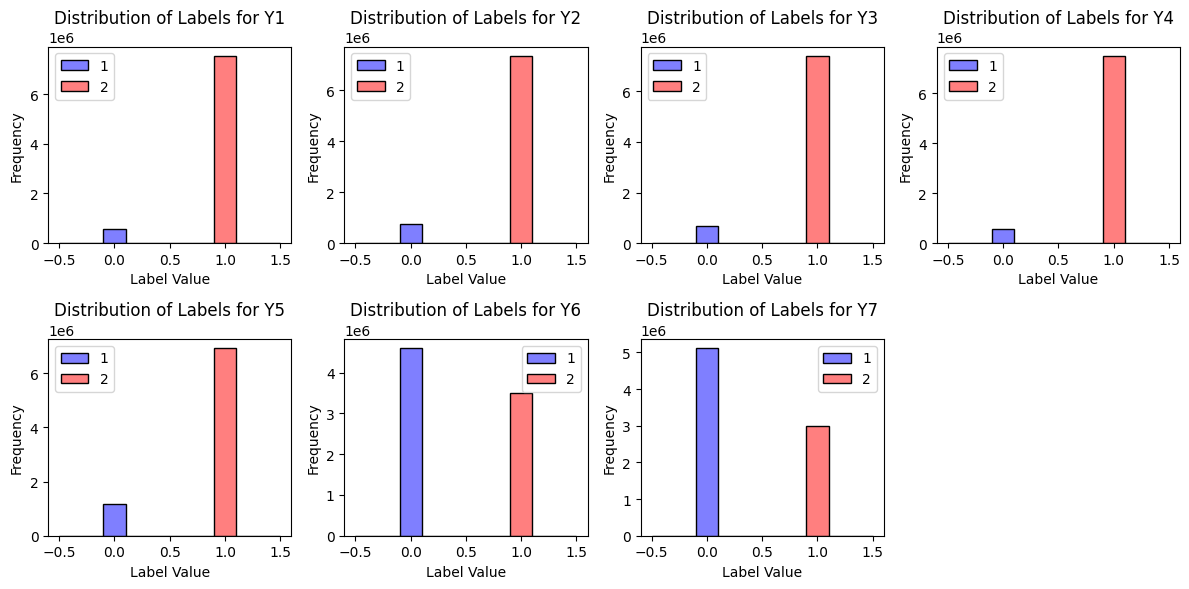

In [100]:
num_rows = 2  # Adjust as needed
num_cols = 4  # Adjust as needed

# Loop through each label column and create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
for i, label in enumerate(data_label.columns):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    # Filter values 1 and 2 from the label column
    values_1 = data_label[label][data_label[label] == 0]
    values_2 = data_label[label][data_label[label] == 1]

    # Create a histogram or bar plot on the current subplot
    sns.histplot(values_1, bins=5, color='blue', alpha=0.5, label='1', ax=ax)
    sns.histplot(values_2, bins=5, color='red', alpha=0.5, label='2', ax=ax)

    ax.set_title(f'Distribution of Labels for {label}')
    ax.set_xlabel('Label Value')
    ax.set_ylabel('Frequency')
    ax.legend()

if 7 < num_rows * num_cols:
    for j in range(7, num_rows * num_cols):
        fig.delaxes(axes.ravel()[j])

# Ensure tight layout to avoid overlapping
plt.tight_layout()
plt.show()